# 第7章 时间序列数据分析

## 7.1 时间序列基础

### 7.1.1 创建时间序列数据

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
pd.to_datetime('20180828')   # 将datetime转换为Timestamp对象

Timestamp('2018-08-28 00:00:00')

In [2]:
# 传入多个datetime字符串
date_index = pd.to_datetime(['20180820', '20180828', '20180908'])
date_index

DatetimeIndex(['2018-08-20', '2018-08-28', '2018-09-08'], dtype='datetime64[ns]', freq=None)

In [3]:
date_index[0]   # 取出第一个时间戳

Timestamp('2018-08-20 00:00:00')

In [4]:
# 创建时间序列类型的Series对象
date_ser = pd.Series([11, 22, 33], index=date_index)
date_ser

2018-08-20    11
2018-08-28    22
2018-09-08    33
dtype: int64

In [5]:
# 指定索引为多个datetime的列表
date_list = [datetime(2018, 1, 1), datetime(2018, 1, 15),
             datetime(2018, 2, 20), datetime(2018, 4, 1),
             datetime(2018, 5, 5), datetime(2018, 6, 1)]
time_se = pd.Series(np.arange(6), index=date_list)
time_se

2018-01-01    0
2018-01-15    1
2018-02-20    2
2018-04-01    3
2018-05-05    4
2018-06-01    5
dtype: int32

In [6]:
data_demo = [[11, 22, 33], [44, 55, 66], 
             [77, 88, 99], [12, 23, 34]]
date_list = [datetime(2018, 1, 23), datetime(2018, 2, 15),
             datetime(2018, 5, 22), datetime(2018, 3, 30)]
time_df = pd.DataFrame(data_demo, index=date_list)
time_df

,0,1,2
2018-01-23,11,22,33
2018-02-15,44,55,66
2018-05-22,77,88,99
2018-03-30,12,23,34


### 7.1.2 通过时间戳索引选取子集

In [7]:
# 指定索引为多个日期字符串的列表
date_list = ['2015/05/30', '2017/02/01',
             '2015.6.1', '2016.4.1',
             '2017.6.1', '2018.1.23']
# 将日期字符串转换为DatetimeIndex 
date_index = pd.to_datetime(date_list)
# 创建以DatetimeIndex 为索引的Series对象
date_se = pd.Series(np.arange(6), index=date_index)
date_se

2015-05-30    0
2017-02-01    1
2015-06-01    2
2016-04-01    3
2017-06-01    4
2018-01-23    5
dtype: int32

In [8]:
# 根据位置索引获取数据
time_se[3]

3

In [9]:
date_time = datetime(2015, 6, 1)
date_se[date_time]

2

In [10]:
date_se['20150530']

2015-05-30    0
dtype: int32

In [11]:
date_se['2016-04-01']

2016-04-01    3
dtype: int32

In [12]:
date_se['2018/01/23']

2018-01-23    5
dtype: int32

In [13]:
date_se['6/1/2017']

2017-06-01    4
dtype: int32

In [14]:
date_se['2015']  # 获取2015年的数据

2015-05-30    0
2015-06-01    2
dtype: int32

In [15]:
# 扔掉2016-1-1之前的数据
sorted_se = date_se.sort_index()
sorted_se.truncate(before='2016-1-1')

2016-04-01    3
2017-02-01    1
2017-06-01    4
2018-01-23    5
dtype: int32

In [16]:
# 扔掉2016-7-31之后的数据
sorted_se.truncate(after='2016-7-31')

2015-05-30    0
2015-06-01    2
2016-04-01    3
dtype: int32

## 7.2 固定频率的时间序列

### 7.2.1 创建固定频率的时间序列

In [17]:
# 创建DatetimeIndex对象时，只传入开始日期与结束日期
pd.date_range('2018/08/10', '2018/08/20')

DatetimeIndex(['2018-08-10', '2018-08-11', '2018-08-12', '2018-08-13',
               '2018-08-14', '2018-08-15', '2018-08-16', '2018-08-17',
               '2018-08-18', '2018-08-19', '2018-08-20'],
              dtype='datetime64[ns]', freq='D')

In [18]:
# 创建DatetimeIndex对象时，传入start与periods参数
pd.date_range(start='2018/08/10', periods=5)

DatetimeIndex(['2018-08-10', '2018-08-11', '2018-08-12', '2018-08-13',
               '2018-08-14'],
              dtype='datetime64[ns]', freq='D')

In [19]:
# 创建DatetimeIndex对象时，传入end与periods参数
pd.date_range(end='2018/08/10', periods=5)

DatetimeIndex(['2018-08-06', '2018-08-07', '2018-08-08', '2018-08-09',
               '2018-08-10'],
              dtype='datetime64[ns]', freq='D')

In [20]:
dates_index = pd.date_range('2018-01-01',         # 起始日期
                            periods=5,            # 周期
                            freq='W-SUN')         # 频率
dates_index

DatetimeIndex(['2018-01-07', '2018-01-14', '2018-01-21', '2018-01-28',
               '2018-02-04'],
              dtype='datetime64[ns]', freq='W-SUN')

In [21]:
ser_data = [12, 56, 89, 99, 31]
pd.Series(ser_data, dates_index)

2018-01-07    12
2018-01-14    56
2018-01-21    89
2018-01-28    99
2018-02-04    31
Freq: W-SUN, dtype: int64

In [22]:
# 创建DatetimeIndex，并指定开始日期、产生日期个数、默认的频率，以及时区
pd.date_range(start='2018/8/1 12:13:30', periods=5, 
              tz='Asia/Hong_Kong')

DatetimeIndex(['2018-08-01 12:13:30+08:00', '2018-08-02 12:13:30+08:00',
               '2018-08-03 12:13:30+08:00', '2018-08-04 12:13:30+08:00',
               '2018-08-05 12:13:30+08:00'],
              dtype='datetime64[ns, Asia/Hong_Kong]', freq='D')

In [23]:
#规范化时间戳
pd.date_range(start='2018/8/1 12:13:30', periods=5, 
              normalize=True, tz='Asia/Hong_Kong')

DatetimeIndex(['2018-08-01 00:00:00+08:00', '2018-08-02 00:00:00+08:00',
               '2018-08-03 00:00:00+08:00', '2018-08-04 00:00:00+08:00',
               '2018-08-05 00:00:00+08:00'],
              dtype='datetime64[ns, Asia/Hong_Kong]', freq='D')

### 7.2.2 时间序列的频率、偏移量

In [24]:
pd.date_range(start='2018/2/1', end='2018/2/28', freq='5D')

DatetimeIndex(['2018-02-01', '2018-02-06', '2018-02-11', '2018-02-16',
               '2018-02-21', '2018-02-26'],
              dtype='datetime64[ns]', freq='5D')

In [25]:
from pandas.tseries.offsets import *
DateOffset(months=4, days=5)

<DateOffset: days=5, months=4>

In [26]:
Week(2) + Hour(10)

Timedelta('14 days 10:00:00')

In [27]:
# 生成日期偏移量
date_offset  = Week(2) + Hour(10)
pd.date_range('2018/3/1', '2018/3/31', freq=date_offset)

DatetimeIndex(['2018-03-01 00:00:00', '2018-03-15 10:00:00',
               '2018-03-29 20:00:00'],
              dtype='datetime64[ns]', freq='346H')

### 7.2.3 时间序列数据的移动

In [28]:
date_index = pd.date_range('2018/01/01', periods=5)
time_ser = pd.Series(np.arange(5) + 1, index=date_index)
time_ser

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
Freq: D, dtype: int32

In [29]:
# 向后移动一次
time_ser.shift(1)

2018-01-01    NaN
2018-01-02    1.0
2018-01-03    2.0
2018-01-04    3.0
2018-01-05    4.0
Freq: D, dtype: float64

In [30]:
# 向前移动一次
time_ser.shift(-1)

2018-01-01    2.0
2018-01-02    3.0
2018-01-03    4.0
2018-01-04    5.0
2018-01-05    NaN
Freq: D, dtype: float64

## 7.3 时间周期及计算

### 7.3.1 创建时期对象

In [32]:
# 创建Period对象，表示从2018-01-01到2018-12-31之间的时间段
pd.Period(2018)

Period('2018', 'A-DEC')

In [33]:
# 表示从2017-06-01到2017-06-30之间的整月时间
period = pd.Period('2017/6')
period

Period('2017-06', 'M')

In [34]:
period + 1   # Period对象加上一个整数

Period('2017-07', 'M')

In [35]:
period - 5    # Period对象减去一个整数

Period('2017-01', 'M')

In [36]:
# 创建一个与period频率相同的时期
other_period = pd.Period(201201, freq='M' )
period - other_period

65

In [37]:
period_index = pd.period_range('2012.1.8', '2012.5.31', freq='M')
period_index

PeriodIndex(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05'], dtype='period[M]', freq='M')

In [38]:
str_list = ['2010', '2011', '2012']
pd.PeriodIndex(str_list, freq='A-DEC')

PeriodIndex(['2010', '2011', '2012'], dtype='period[A-DEC]', freq='A-DEC')

In [39]:
period_ser = pd.Series(np.arange(5), period_index)
period_ser

2012-01    0
2012-02    1
2012-03    2
2012-04    3
2012-05    4
Freq: M, dtype: int32

### 7.3.2 时期的频率转换

In [40]:
# 创建时期对象
period = pd.Period('2017', freq='A-DEC')
period.asfreq('M', how='start')

Period('2017-01', 'M')

In [41]:
period.asfreq('M', how='end')

Period('2017-12', 'M')

## 7.4 重采样

### 7.4.1 重采样方法（resample）

In [42]:
date_index = pd.date_range('2017.7.8', periods=30)
time_ser = pd.Series(np.arange(30), index=date_index)
time_ser

2017-07-08     0
2017-07-09     1
2017-07-10     2
2017-07-11     3
2017-07-12     4
2017-07-13     5
2017-07-14     6
2017-07-15     7
2017-07-16     8
2017-07-17     9
2017-07-18    10
2017-07-19    11
2017-07-20    12
2017-07-21    13
2017-07-22    14
2017-07-23    15
2017-07-24    16
2017-07-25    17
2017-07-26    18
2017-07-27    19
2017-07-28    20
2017-07-29    21
2017-07-30    22
2017-07-31    23
2017-08-01    24
2017-08-02    25
2017-08-03    26
2017-08-04    27
2017-08-05    28
2017-08-06    29
Freq: D, dtype: int32

In [43]:
time_ser.resample('W-MON', how='mean')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


2017-07-10     1.0
2017-07-17     6.0
2017-07-24    13.0
2017-07-31    20.0
2017-08-07    26.5
Freq: W-MON, dtype: float64

In [44]:
time_ser.resample('W-MON').mean()

2017-07-10     1.0
2017-07-17     6.0
2017-07-24    13.0
2017-07-31    20.0
2017-08-07    26.5
Freq: W-MON, dtype: float64

In [45]:
time_ser.resample('W-MON', closed='left').mean()

2017-07-10     0.5
2017-07-17     5.0
2017-07-24    12.0
2017-07-31    19.0
2017-08-07    26.0
Freq: W-MON, dtype: float64

### 7.4.2 降采样

In [46]:
date_index = pd.date_range('2018/06/01', periods=30)
shares_data = np.random.rand(30)
time_ser = pd.Series(shares_data, index=date_index)
time_ser

2018-06-01    0.546797
2018-06-02    0.207945
2018-06-03    0.645133
2018-06-04    0.115933
2018-06-05    0.660877
2018-06-06    0.436425
2018-06-07    0.172026
2018-06-08    0.005449
2018-06-09    0.136590
2018-06-10    0.138479
2018-06-11    0.111813
2018-06-12    0.153655
2018-06-13    0.540258
2018-06-14    0.657184
2018-06-15    0.869546
2018-06-16    0.312043
2018-06-17    0.452566
2018-06-18    0.609095
2018-06-19    0.789594
2018-06-20    0.711466
2018-06-21    0.212001
2018-06-22    0.783654
2018-06-23    0.579463
2018-06-24    0.877164
2018-06-25    0.079092
2018-06-26    0.139798
2018-06-27    0.164090
2018-06-28    0.427031
2018-06-29    0.415344
2018-06-30    0.698203
Freq: D, dtype: float64

In [47]:
time_ser.resample('7D').ohlc()  # OHLC重采样

,open,high,low,close
2018-06-01,0.546797,0.660877,0.115933,0.172026
2018-06-08,0.005449,0.657184,0.005449,0.657184
2018-06-15,0.869546,0.869546,0.212001,0.212001
2018-06-22,0.783654,0.877164,0.079092,0.427031
2018-06-29,0.415344,0.698203,0.415344,0.698203


In [48]:
# 通过groupby技术实现降采样
time_ser.groupby(lambda x: x.week).mean()

22    0.466625
23    0.237968
24    0.442438
25    0.651777
26    0.320593
dtype: float64

### 7.4.3 升采样

In [49]:
data_demo = np.array([['101', '210', '150'], ['330', '460', '580']])
date_index = pd.date_range('2018/06/10', periods=2, freq='W-SUN')
time_df = pd.DataFrame(data_demo, index=date_index, 
columns=['A产品', 'B产品', 'C产品'])
time_df

,A产品,B产品,C产品
2018-06-10,101,210,150
2018-06-17,330,460,580


In [50]:
time_df.resample('D').asfreq()

,A产品,B产品,C产品
2018-06-10,101,210,150
2018-06-11,NaN,NaN,NaN
2018-06-12,NaN,NaN,NaN
2018-06-13,NaN,NaN,NaN
2018-06-14,NaN,NaN,NaN
2018-06-15,NaN,NaN,NaN
2018-06-16,NaN,NaN,NaN
2018-06-17,330,460,580


In [51]:
time_df.resample('D').ffill()

,A产品,B产品,C产品
2018-06-10,101,210,150
2018-06-11,101,210,150
2018-06-12,101,210,150
2018-06-13,101,210,150
2018-06-14,101,210,150
2018-06-15,101,210,150
2018-06-16,101,210,150
2018-06-17,330,460,580


## 7.5 数据统计—滑动窗口

In [52]:
year_data = np.random.randn(365)
date_index = pd.date_range('2017-01-01', '2017-12-31', freq='D')
ser = pd.Series(year_data, date_index)
ser.head()

2017-01-01    0.066271
2017-01-02   -0.015969
2017-01-03   -0.845204
2017-01-04    1.009256
2017-01-05    0.613716
Freq: D, dtype: float64

In [53]:
roll_window = ser.rolling(window=10)
roll_window

Rolling [window=10,center=False,axis=0]

In [54]:
roll_window.mean()

2017-01-01         NaN
2017-01-02         NaN
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-07         NaN
2017-01-08         NaN
2017-01-09         NaN
2017-01-10    0.067507
2017-01-11   -0.084070
2017-01-12   -0.074100
2017-01-13   -0.005691
2017-01-14   -0.039851
2017-01-15   -0.101113
2017-01-16   -0.198285
2017-01-17   -0.041308
2017-01-18   -0.019553
2017-01-19    0.023875
2017-01-20   -0.123106
2017-01-21   -0.002899
2017-01-22   -0.064119
2017-01-23    0.072553
2017-01-24   -0.062451
2017-01-25   -0.172088
2017-01-26    0.129399
2017-01-27   -0.057855
2017-01-28   -0.016647
2017-01-29   -0.065930
2017-01-30   -0.019916
                ...   
2017-12-02   -0.158739
2017-12-03   -0.139049
2017-12-04   -0.165832
2017-12-05   -0.156529
2017-12-06   -0.253572
2017-12-07   -0.363675
2017-12-08   -0.341894
2017-12-09   -0.319462
2017-12-10   -0.250706
2017-12-11   -0.223689
2017-12-12   -0.419421
2017-12-13   -0.360186
2017-12-14 

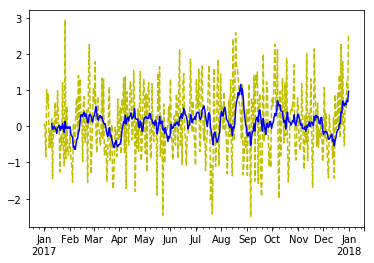

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
ser.plot(style='y--')
ser_window = ser.rolling(window=10).mean()
ser_window.plot(style='b')

## 7.7 案例—股票预测分析

### 7.7.3	功能实现

In [56]:
# 导入需要使用的包
import pandas as pd
import datetime
import matplotlib.pylab as plt
# 导入统计模型ARIMA与相关函数
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 解决matplotlib显示中文问题
# 指定默认字体
plt.rcParams['font.sans-serif'] = ['SimHei']  
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

In [57]:
# 读取历史股票数据
data_path = open(r'C:\Users\admin\Desktop\五粮液股票数据.csv')
shares_info = pd.read_csv(data_path)
shares_info

,股票代码,交易日期,开盘价,最高价,最低价,收盘价,昨收价,涨跌额,涨跌幅,成交量（手）,成交额（千元）
0,000858.SZ,20180920,64.40,64.85,64.03,64.39,64.44,-0.05,-0.0776,164165.71,1.056728e+06
1,000858.SZ,20180919,62.99,65.53,62.90,64.44,63.21,1.23,1.9459,411364.31,2.653606e+06
2,000858.SZ,20180918,61.62,63.60,61.01,63.21,61.86,1.35,2.1823,263861.24,1.647394e+06
3,000858.SZ,20180917,61.40,62.56,61.03,61.86,61.53,0.33,0.5363,235508.59,1.458776e+06
4,000858.SZ,20180914,60.45,62.16,59.70,61.53,59.98,1.55,2.5842,294960.29,1.800648e+06
5,000858.SZ,20180913,60.39,60.65,58.58,59.98,59.65,0.33,0.5532,206865.36,1.232442e+06
6,000858.SZ,20180912,61.00,61.00,59.59,59.65,61.00,-1.35,-2.2131,191607.79,1.150745e+06
7,000858.SZ,20180911,60.38,61.35,60.20,61.00,60.38,0.62,1.0268,202919.36,1.235002e+06
8,000858.SZ,20180910,60.92,60.96,59.28,60.38,60.77,-0.39,-0.6418,195919.16,1.179507e+06
9,000858.SZ,20180907,60.30,61.15,59.80,60.77,59.71,1.06,1.7752,222726.04,1.347995e+06


In [58]:
# 将“交易日期”一列设置为行索引
dates = pd.to_datetime(shares_info['交易日期'].values,
                       format='%Y%m%d')
shares_info = shares_info.set_index(dates)
shares_info

,股票代码,交易日期,开盘价,最高价,最低价,收盘价,昨收价,涨跌额,涨跌幅,成交量（手）,成交额（千元）
2018-09-20,000858.SZ,20180920,64.40,64.85,64.03,64.39,64.44,-0.05,-0.0776,164165.71,1.056728e+06
2018-09-19,000858.SZ,20180919,62.99,65.53,62.90,64.44,63.21,1.23,1.9459,411364.31,2.653606e+06
2018-09-18,000858.SZ,20180918,61.62,63.60,61.01,63.21,61.86,1.35,2.1823,263861.24,1.647394e+06
2018-09-17,000858.SZ,20180917,61.40,62.56,61.03,61.86,61.53,0.33,0.5363,235508.59,1.458776e+06
2018-09-14,000858.SZ,20180914,60.45,62.16,59.70,61.53,59.98,1.55,2.5842,294960.29,1.800648e+06
2018-09-13,000858.SZ,20180913,60.39,60.65,58.58,59.98,59.65,0.33,0.5532,206865.36,1.232442e+06
2018-09-12,000858.SZ,20180912,61.00,61.00,59.59,59.65,61.00,-1.35,-2.2131,191607.79,1.150745e+06
2018-09-11,000858.SZ,20180911,60.38,61.35,60.20,61.00,60.38,0.62,1.0268,202919.36,1.235002e+06
2018-09-10,000858.SZ,20180910,60.92,60.96,59.28,60.38,60.77,-0.39,-0.6418,195919.16,1.179507e+06
2018-09-07,000858.SZ,20180907,60.30,61.15,59.80,60.77,59.71,1.06,1.7752,222726.04,1.347995e+06


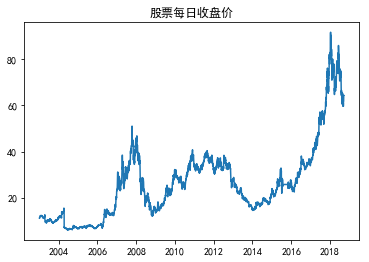

In [59]:
plt.plot(shares_info['收盘价'])
plt.title('股票每日收盘价')
plt.show()

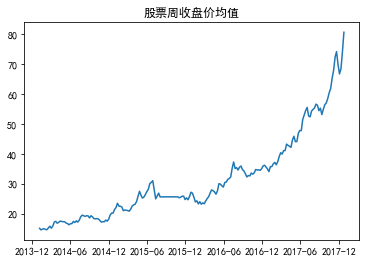

In [60]:
#  按周重采样
shares_info_week = shares_info['收盘价'].resample('W-MON').mean()
# 训练数据
train_data = shares_info_week['2014': '2017']
plt.plot(train_data)
plt.title('股票周收盘价均值')
plt.show()

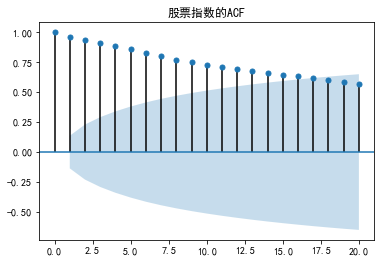

In [61]:
# 分析ACF系数
acf = plot_acf(train_data,lags=20)
plt.title('股票指数的ACF')
plt.show()

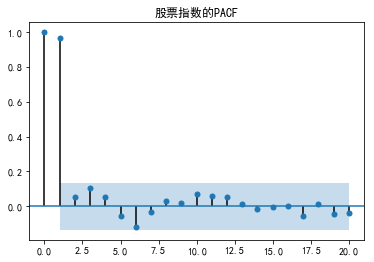

In [62]:
# 分析PACF
pacf = plot_pacf(train_data,lags=20)
plt.title('股票指数的PACF')
plt.show()

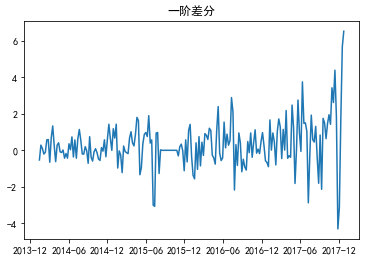

In [63]:
train_diff = train_data.diff()
diff=train_diff.dropna()
plt.figure()
plt.plot(diff)
plt.title('一阶差分')
plt.show()

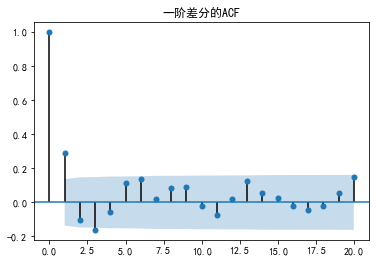

In [64]:
acf_diff = plot_acf(diff,lags=20)
plt.title('一阶差分的ACF')
plt.show()

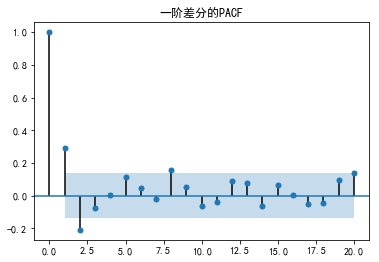

In [65]:
pacf_diff = plot_pacf(diff,lags=20)
plt.title('一阶差分的PACF')
plt.show()

In [66]:
# 创建ARIMA模型
model = ARIMA(train_data, order=(1, 1, 1), freq='W-MON')
# 拟合模型
arima_result = model.fit()
# 通过summary()方法输出关于ARIMA模型中的详细参数说明。
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.收盘价   No. Observations:                  207
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -330.750
Method:                       css-mle   S.D. of innovations              1.195
Date:                Thu, 25 Oct 2018   AIC                            669.499
Time:                        09:53:22   BIC                            682.830
Sample:                    01-13-2014   HQIC                           674.890
                         - 12-25-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3228      0.115      2.813      0.005       0.098       0.548
ar.L1.D.收盘价     0.0047      0.167      0.028      0.978      -0.323       0.332
ma.L1.D.收盘价     0.3762      0.148      2.547      0.012       0.087       0.666
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          214.6427           +0.0000j          214.6427            0.0000
MA.1           -2.6579           +0.0000j            2.6579            0.5000
-----------------------------------------------------------------------------
"""

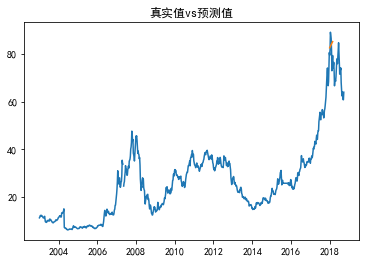

In [67]:
pred_vals = arima_result.predict('2018-01-01','2018-02-26',
                                 dynamic=True, typ='levels')
stock_forcast = pd.concat([shares_info_week, pred_vals],
                          axis=1, 
                          keys=['original', 'predicted'])
plt.figure()
plt.plot(stock_forcast)
plt.title('真实值vs预测值')
plt.show()